# Final Exam

## Part 1: Coding Problems

For the questions in this section, make sure test your implementations and demonstrate they work.

### 1. *Tensor Dot Product*

a. Implement a function `tensor_product(A,B)` that takes two rank-3 tensors (meaning each has three indicies, for example tensor $A$ has elements $a_{ijk}$ and represented as `a[i][j][k]` in python), and multiplies them using the following rule:

$c_{ij} = \sum_{k} a_{ijk} b_{kji}$

assume the tensors are lists of lists of lists. Ensure that the dimensions of the incoming tensors are corrent (by using `len()`). 

In [0]:
# Answer Here
def tensor_product(A,B):
    tot=0
    c=list()
    if len(B)==len(A):
        for i in range(len(A)):
            for j in range (len(A[0])):
                for k in range (len(A[0][0])):
                    tot+=A[i][j][k]*B[k][j][i]
            #print tot
            c.append([tot])
            tot=0
    return c

In [0]:
# Test Here
A=[[[1,2],[4,5]],[[7,8],[10,11]]]
B=[[[12,11],[9,8]],[[6,5],[3,2]]]
C=tensor_product(A,B)
print (C)

[[75], [219]]


b. Modify the example so it can take tensors that have `numpy`-like interface *and* lists of lists of lists. Hint: for simplicity, just recast the list-baesd input as a `numpy` tensor.

In [0]:
# Answer Here
def tensor_product2(A,B):
    import numpy as np
    A=np.array(A)
    B=np.array(B)
    tot=0
    c=list()
    if len(B)==len(A):
        for i in range(len(A)):
            for j in range (len(A[0])):
                for k in range (len(A[0][0])):
                    tot+=A[i][j][k]*B[k][j][i]
            #print tot
            c.append([tot])
            tot=0
    return c

In [0]:
# Test Here
A=[[[1,2],[4,5]],[[7,8],[10,11]]]
B=[[[12,11],[9,8]],[[6,5],[3,2]]]
C=tensor_product2(A,B)
print (C)

[[75], [219]]


c. Now add additional optional argument to `tensor_product(A,B,axes)`, where `axes` is an interger $n$ indicating sum over the last $n$ axes of $A$ and the first $n$ axes of $B$ in order. The sizes of the corresponding axes must match. Note that the implementations above correspond to $n=1$, which should be the default. Note that $n=0$ corresponds to no sum at all.

In [0]:
# Answer Here
def tensor_product(A,B,axes):
  

In [0]:
# Test Here

d. Now extend your implementation to arbitrary rank tensors. This is meant to be hard, so come back to this question if you cannot figure it out quickly.

### 2. 4-Vectors


 In relativistic mechanics, the Energy and Momentum of particles are different in every frame, but obey $m^2=E^2-\vec{p}^2$ or $E^2=\vec{p}^2$ for massless particles, where we set the speed of light $c=1$. It is therefore convenient to express the Energy and Momentum of a particle as a 4-vector, for example in Euclidean coordiates: $p= (E,p_{x},p_{y},p_{z}) = (E,\vec{p})$.


a. Implement a new `four_vector` class that holds the 4 components of a 4-vector implements interface:

* Constructor takes the 0, 3, or 4 components as input. If 0 inputs, then the vector is $(0,0,0,0)$. If 3, then the vector is $(\sqrt{p_x^2+p_y^2+p_z^2},p_x,p_y,p_z)$. If 4, then the vector is $E,p_x,p_y,p_z)$. Note that $E$ cannot be negative.

* Adding two 4-vectors corresponds to adding the individual components.

* Negating a 4-vector corresponds to just negating the last 3 components.

* Multiplying two 4-vectors returns: $a \cdot b = E^a E^b -p^a_x p^b_x-p^a_y p^b_y-p^a_z p^b_z$.

* A function `mass()` returns the dot product of the vector with itself.




In [0]:
# Answer Here
class four_vector:
    def __init__(self,A):
        self.A=A
        self.vector=list()
        map(float,self.A)
        
    def Constructor(self):
        import copy
        if self.A[0]<0:
            return "E cannot be less than 0"

        if self.A[0]==0 and self.A[1]==0:
            self.vector=[0,0,0,0]

        if A[0]==0 and A[1]!=0:
            self.vector=[sqrt(A[1]**2+A[2]**2+A[3]**2),A[1],A[2],A[3]]

        if A[0]!=0 and A[1]!=0:
            self.vector=copy.deepcopy(self.A)
        
    def __add__(self,B):
        Vect=list()
        for i in range(len(self.A)):
            Vect.append(float(self.A[i])+float(B[i]))
        return Vect
    
    def Negating(self):
        negate_vect=list()
        neg_num=0
        for i in range(len(self.A)):
            if i>0:
                negate_vect.append(self.A[i]*-1.0)
            else:
                negate_vect.append(self.A[i])
        return negate_vect
        
    def __mul__(self,B):
        mult_vect=list()
        for i in range(len(self.A)):
            mult_vect.append(float(self.A[i])*float(B[i]))
        mult=mult_vect[0]-mult_vect[1]-mult_vect[2]-mult_vect[3]
        return mult
    
    def mass(self,B):
        dot_val=0
        for i in range(len(self.A)):
            dot_val+=float(self.A[i])*float(B[i])
        return dot_val 

In [0]:
# Test Here
A=[5,10,15,20]
B=[20.0,25.0,30.0,35.0]
C=four_vector(A)
hold=C+B
print (hold)
C.Constructor()
hold=C.Negating()
print (hold)
hold=C*B
print (hold)
hold=C.mass(B)
print (hold)

[25.0, 35.0, 45.0, 55.0]
[5, -10.0, -15.0, -20.0]
-1300.0
1500.0


b. Another coordinate system that is used defines the following:

* $p_T = p \sin{\theta}$  where $ p =\sqrt{p_x^2+p_y^2+p_z^2}$, and $\sin{\theta} = \sqrt{p_x^2+p_y^2}/p_z$

* $\eta= - \ln{\tan{\theta/2}}$

* $\tan{\phi} = p_x/p_y$

Implement a setter function that takes this representation as input to set the 4-vector components.

In [0]:
def setter(theta,Px,Py,Pz):
  import math
  Pt=math.sqrt(Px**2+Py**2+Pz**2)*math.sqrt(Px**2+Py**2)/Pz
  sin_theta=float(math.sqrt(Px**2+Py**2))/float(Pz)
  gamma=-1.0*math.log(float(math.tan(theta))/2.0)
  tan_phi=Px/Py
  coor_vect=[Pt,sin_theta,gamma,tan_phi]

## Part 2: Data Science

We will work here with the other dataset from the paper used in lab 9. You can refer back to that lab for whatever you need. 

a. Read the description of the dataset (here)[https://archive.ics.uci.edu/ml/datasets/HIGGS] and  download and unzip the dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz) using `wget` and `gunzip`. 

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
!gunzip HIGGS.csv.gz

--2019-05-08 17:39:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2816407858 (2.6G) [application/x-httpd-php]
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz        100%[===================>]   2.62G  44.0MB/s    in 62s     

2019-05-08 17:40:15 (43.2 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858/2816407858]



In [2]:
filename="HIGGS.csv"
!head -5  "HIGGS.csv"

1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
1.000000000000000000e+00,9.075421094894409180e-01,3.291472792625427246e-01,3.594118654727935791e-01,1.497969865798950195e+00,-3.130095303058624268e-01,1.095530629158020020e+00,-5.575249195098876953e-01,-1.588229775428771973e+00,2.173076152801513672e+00,8.12581181526

b. Load the dataset into a tensor. Compare distributions of signal and background for each variable.

In [3]:
import pandas as pd
VarNames=['Signal','lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi', 
          'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag', 'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b-tag', 'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b-tag', 'jet_4_pt', 
          'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']
df = pd.read_csv(filename, dtype='float64', names=VarNames,nrows=1000000)
df

,Signal,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,...,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
5,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
6,1.0,0.409391,-1.884684,-1.027292,1.672452,-1.604598,1.338015,0.055427,0.013466,2.173076,...,0.069496,1.377130,3.101961,0.869418,1.222083,1.000627,0.545045,0.698653,0.977314,0.828786
7,1.0,0.933895,0.629130,0.527535,0.238033,-0.966569,0.547811,-0.059439,-1.706866,2.173076,...,1.291248,-1.467454,0.000000,0.901837,1.083671,0.979696,0.783300,0.849195,0.894356,0.774879
8,1.0,1.405144,0.536603,0.689554,1.179567,-0.110061,3.202405,-1.526960,-1.576033,0.000000,...,-0.151202,1.163489,0.000000,1.667071,4.039273,1.175828,1.045352,1.542972,3.534827,2.740754
9,1.0,1.176566,0.104161,1.397002,0.479721,0.265513,1.135563,1.534831,-0.253291,0.000000,...,0.268541,0.530334,0.000000,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364


In [0]:
import numpy as np
df_sig=df[df.Signal==1]
df_back=df[df.Signal==0]


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


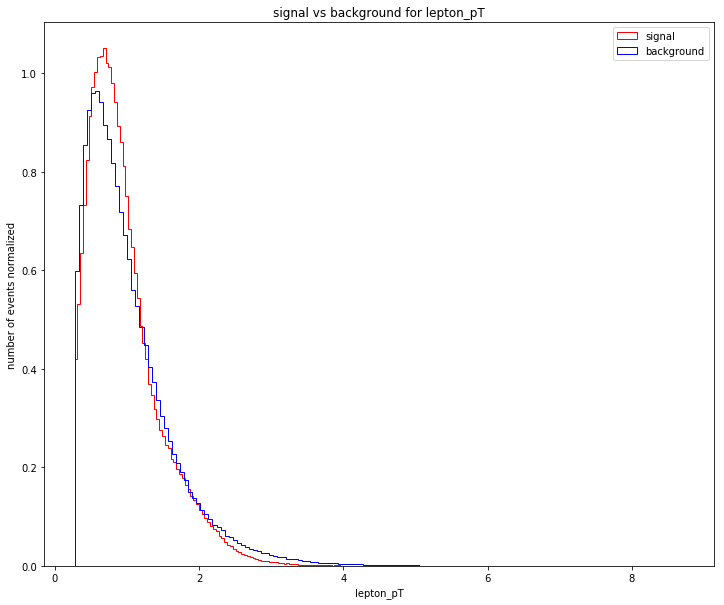

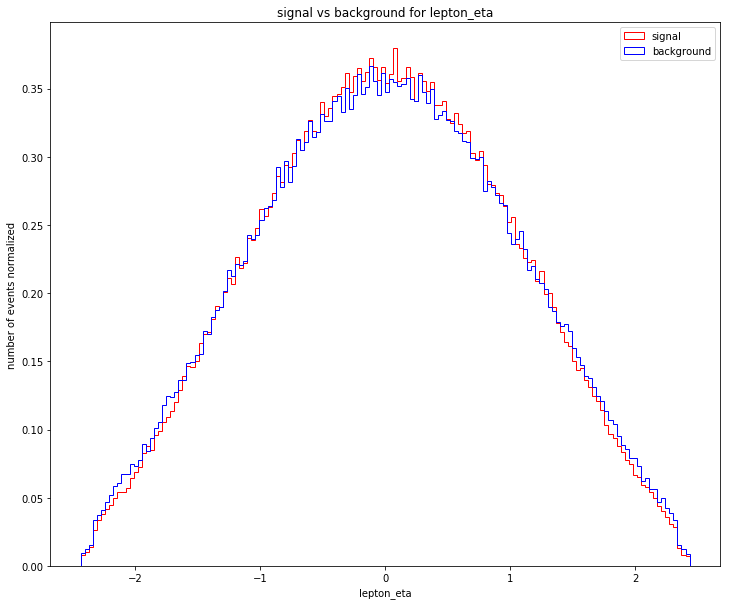

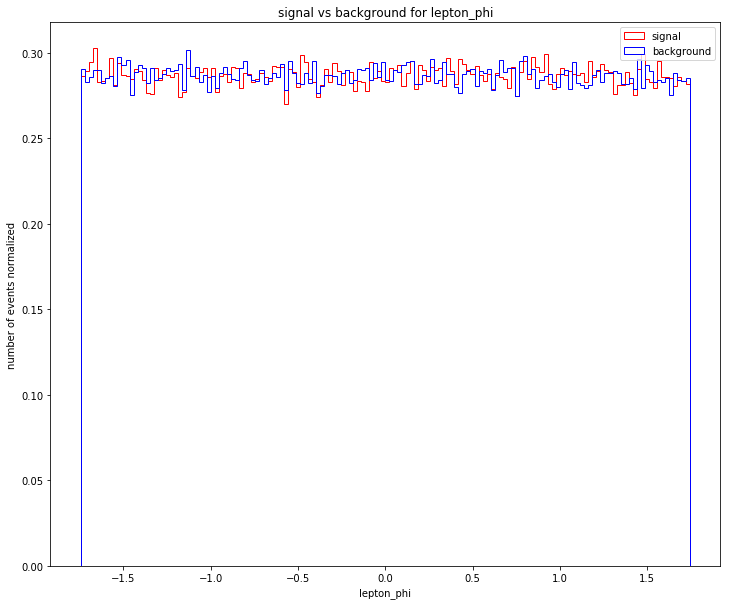

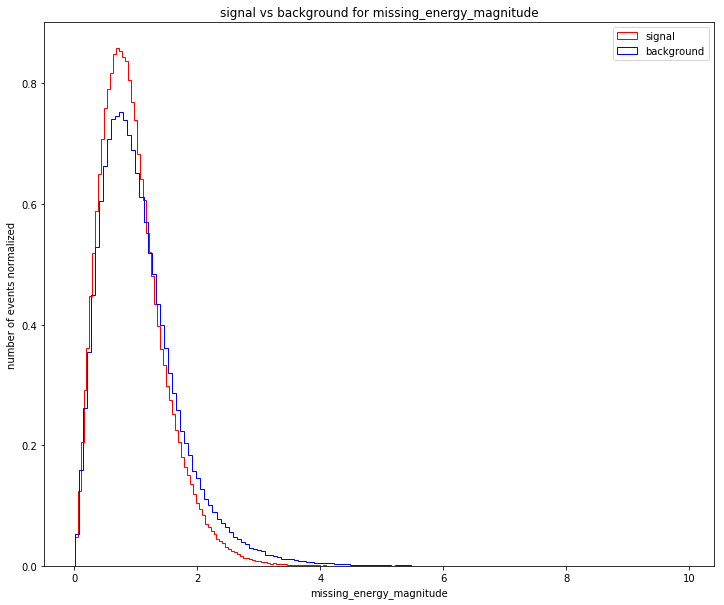

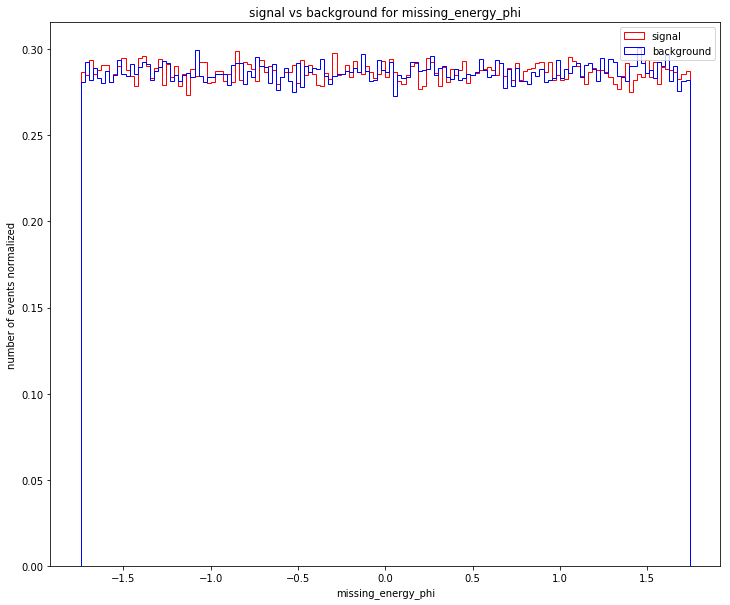

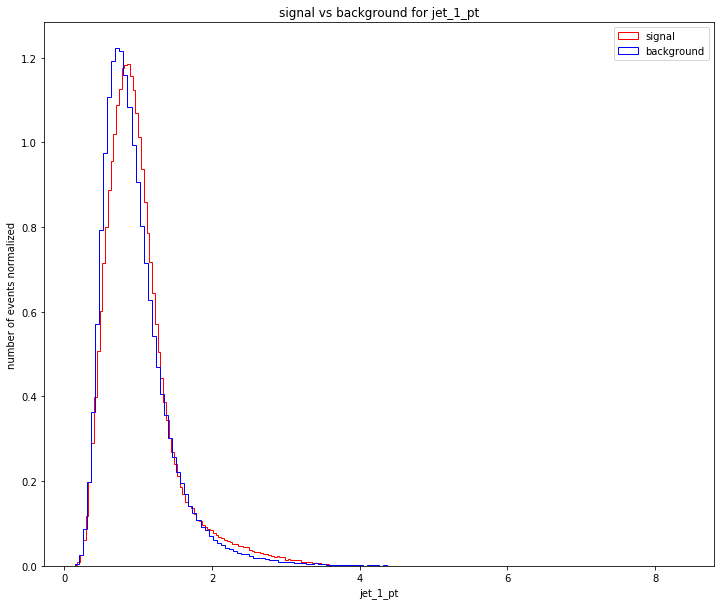

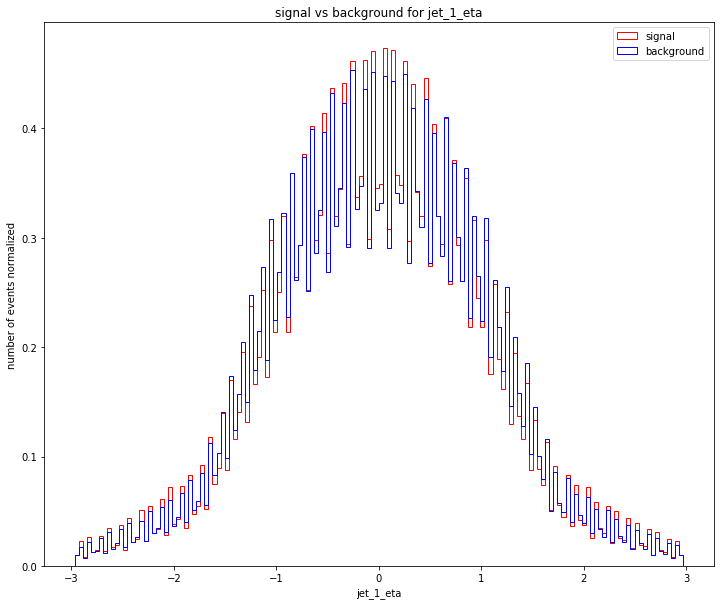

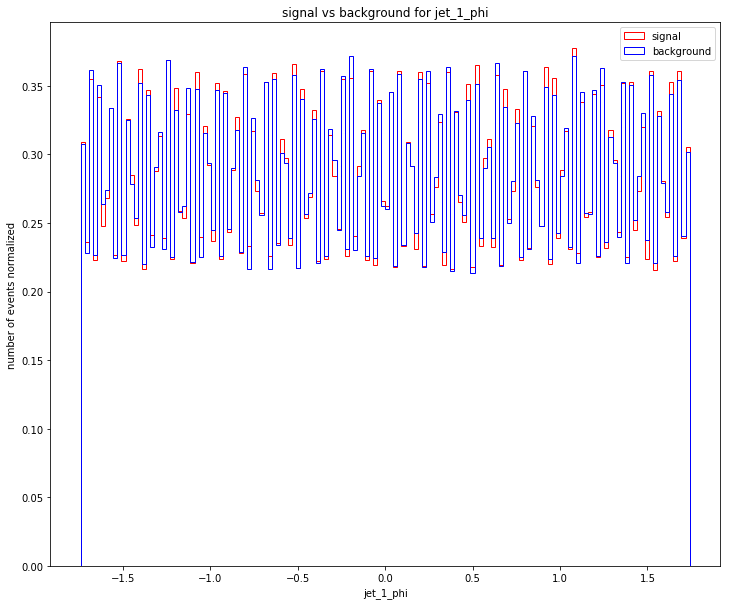

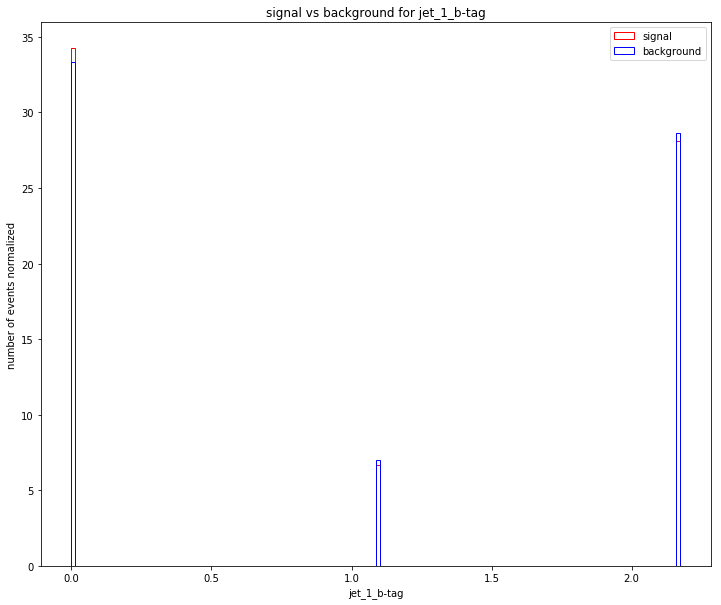

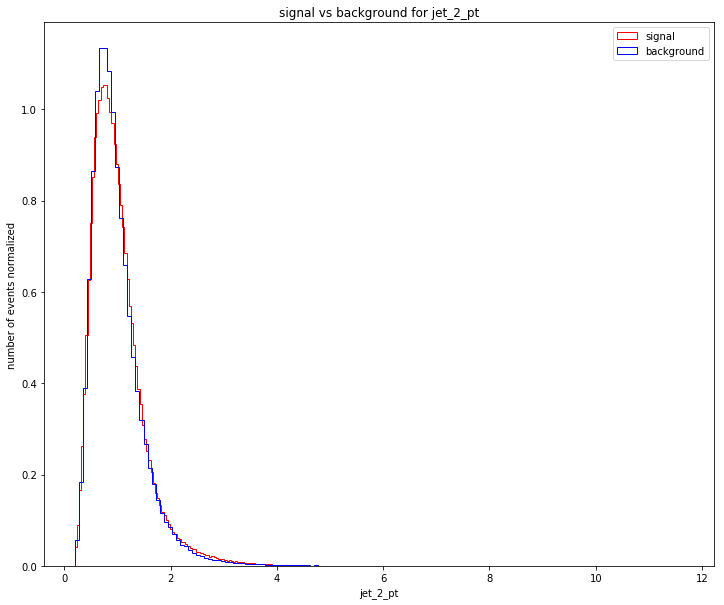

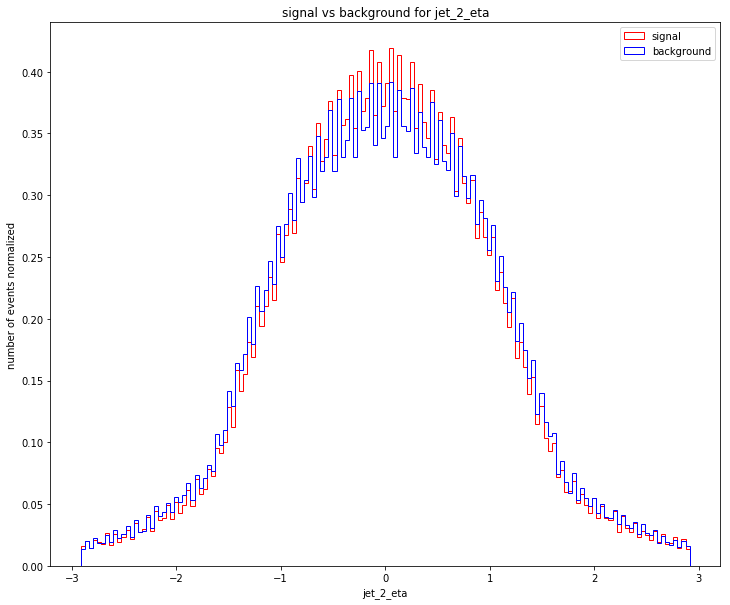

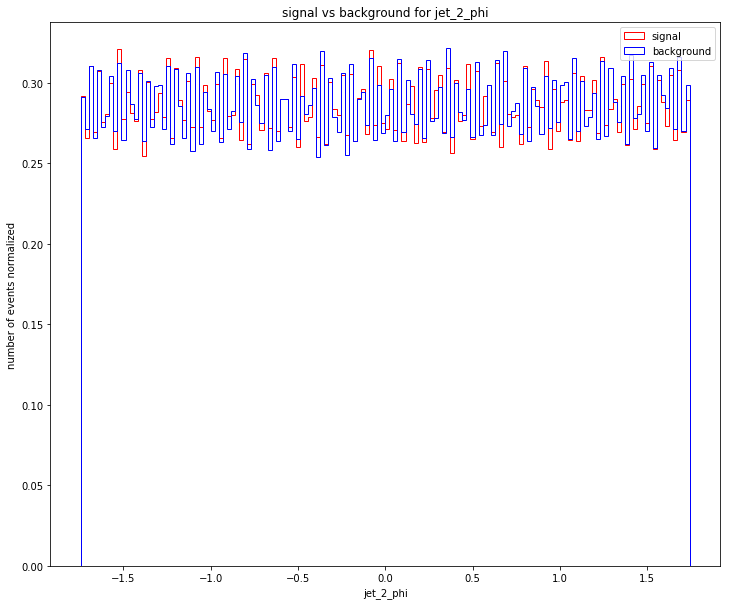

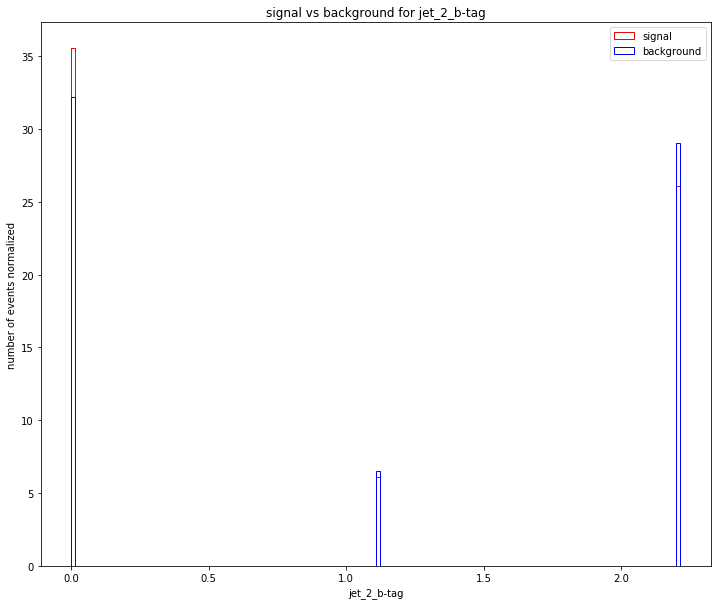

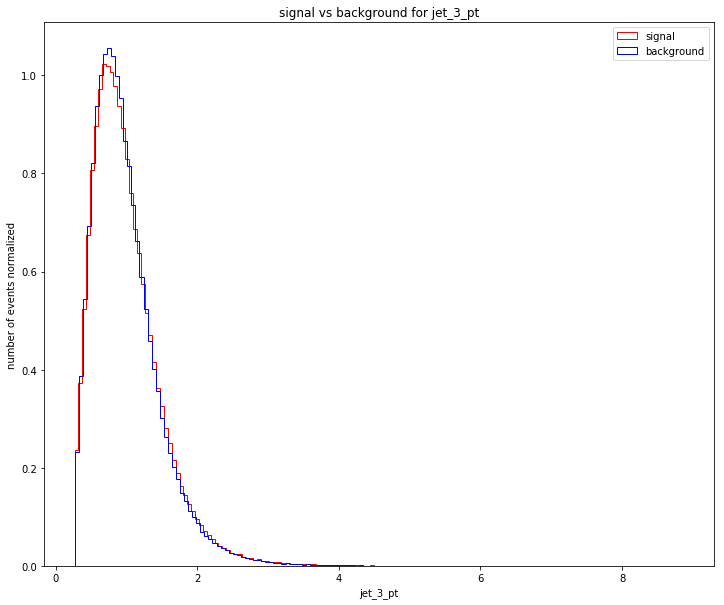

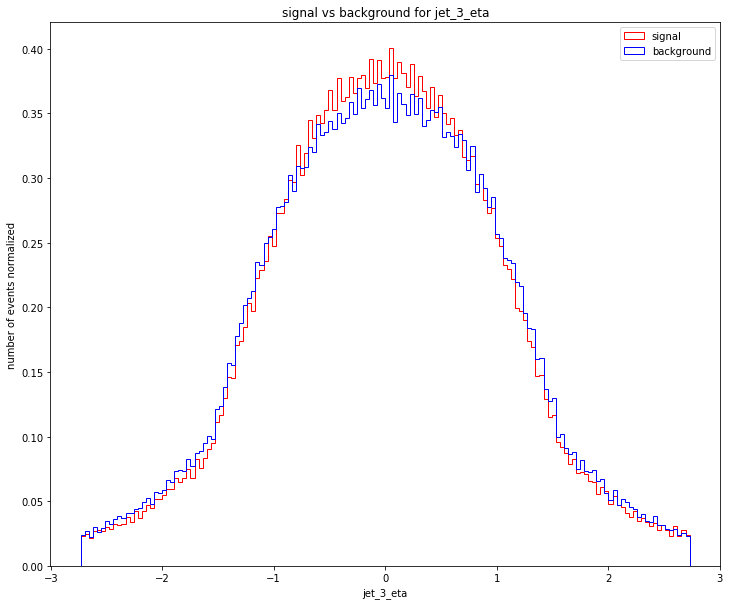

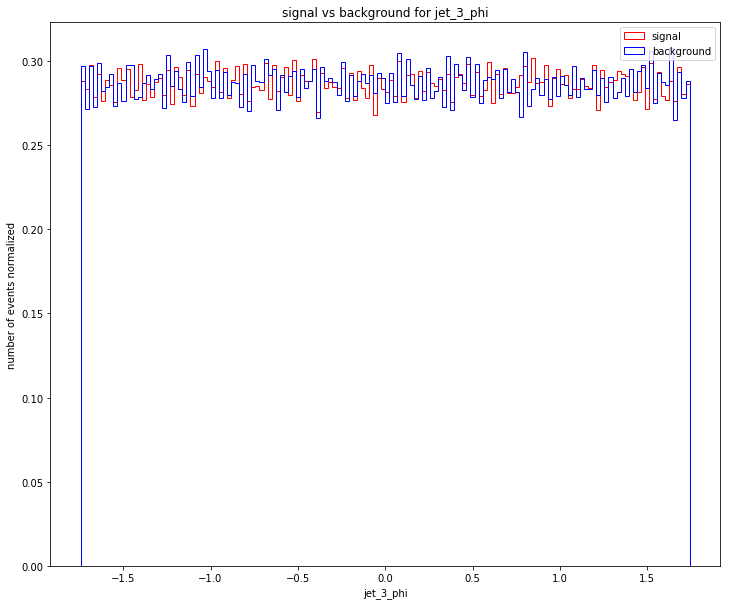

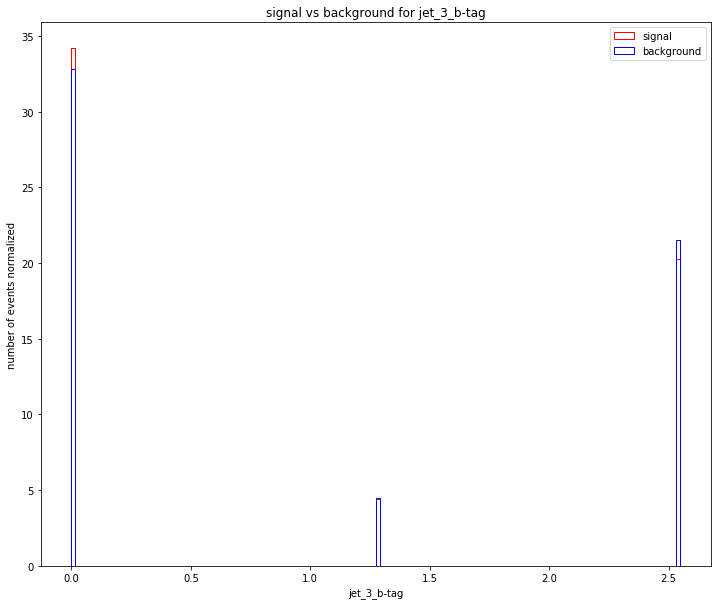

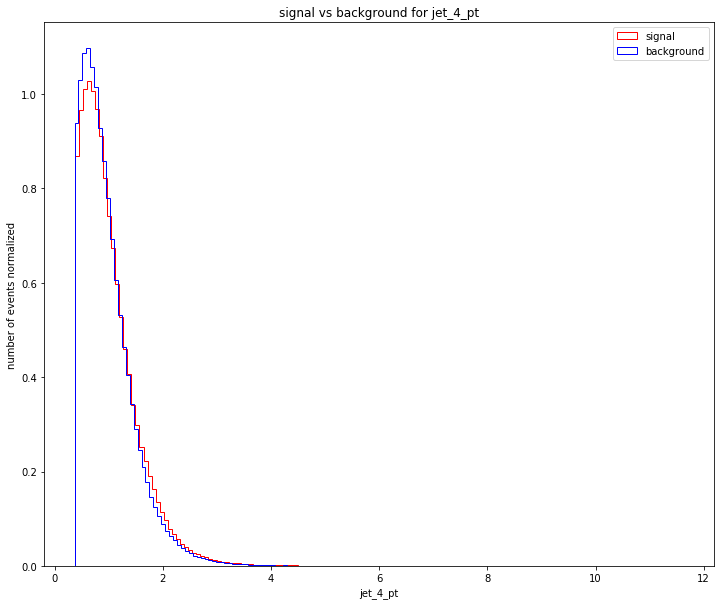

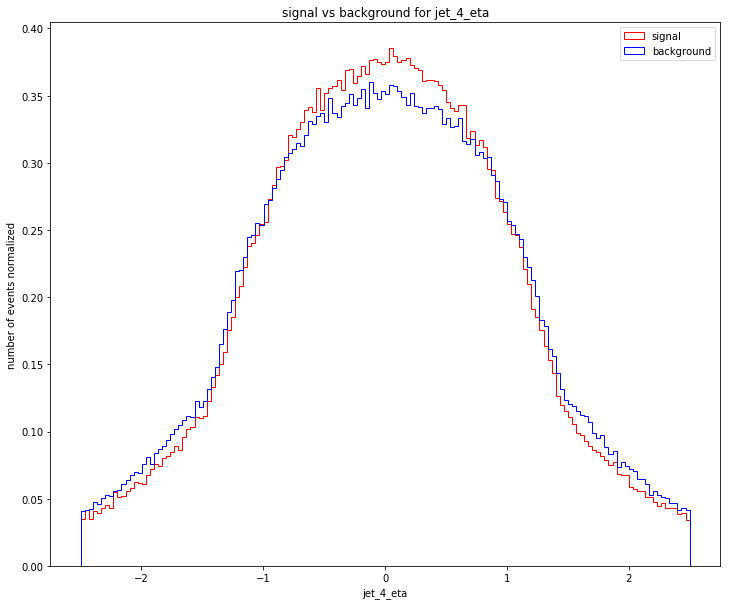

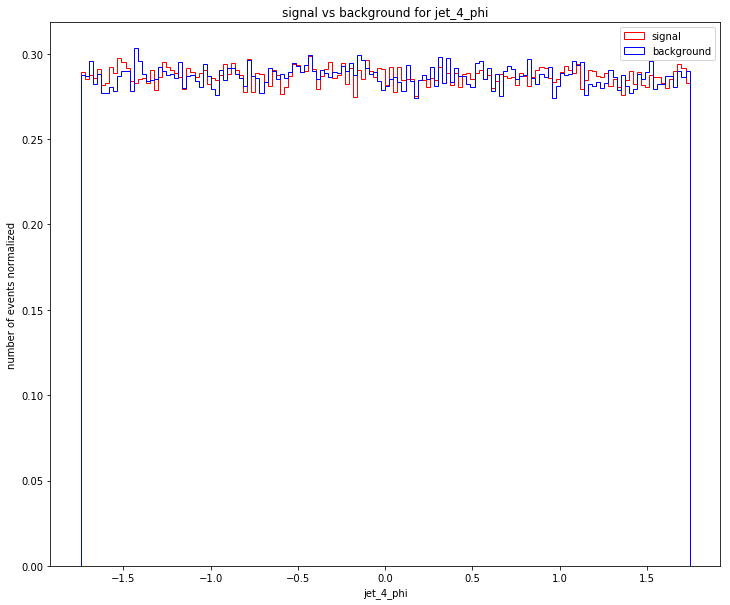

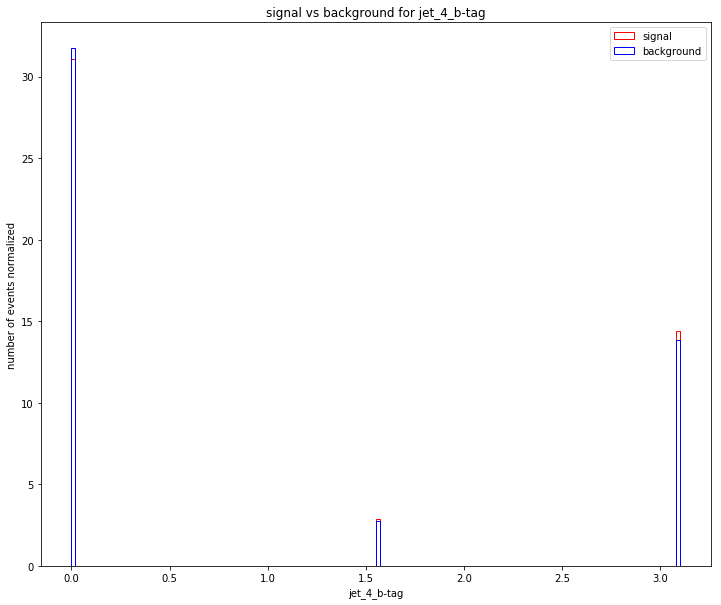

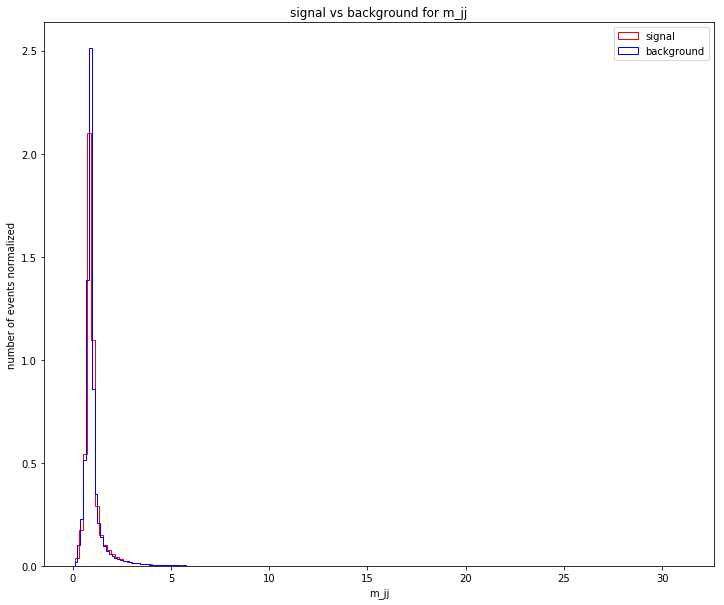

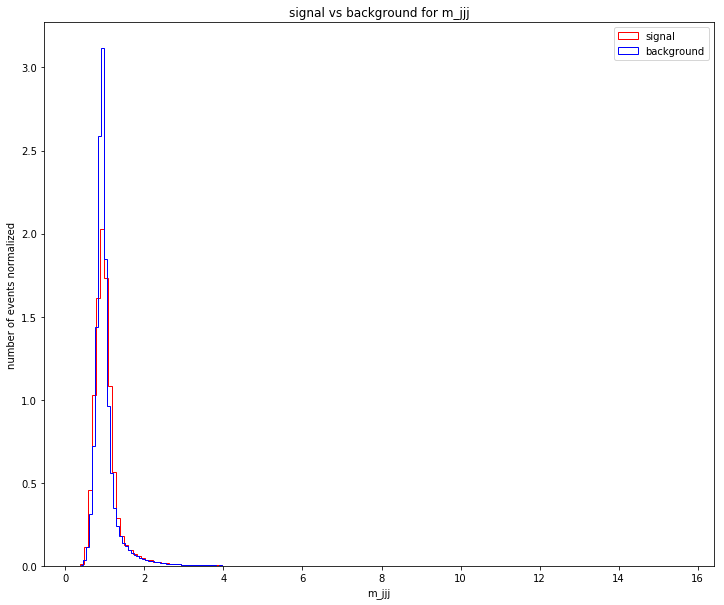

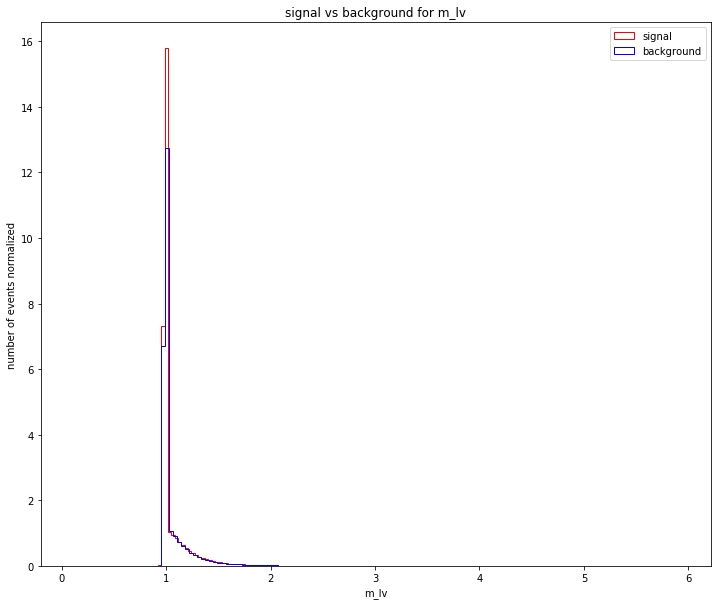

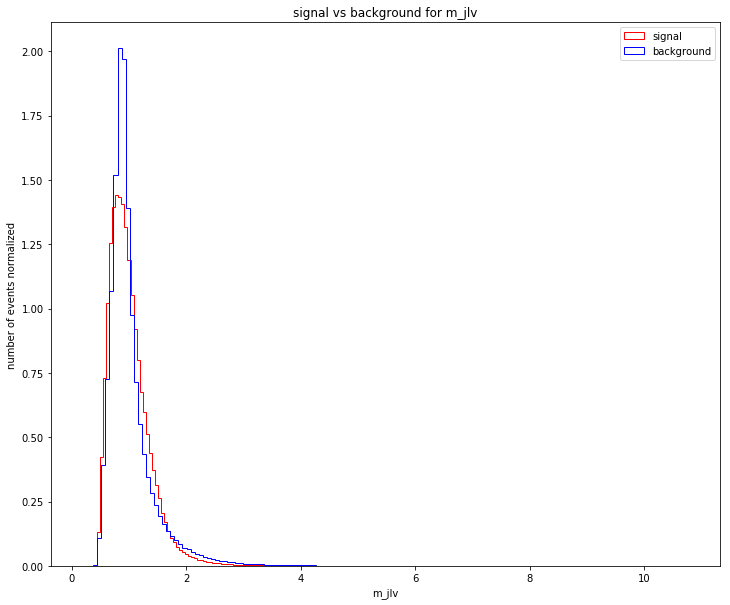

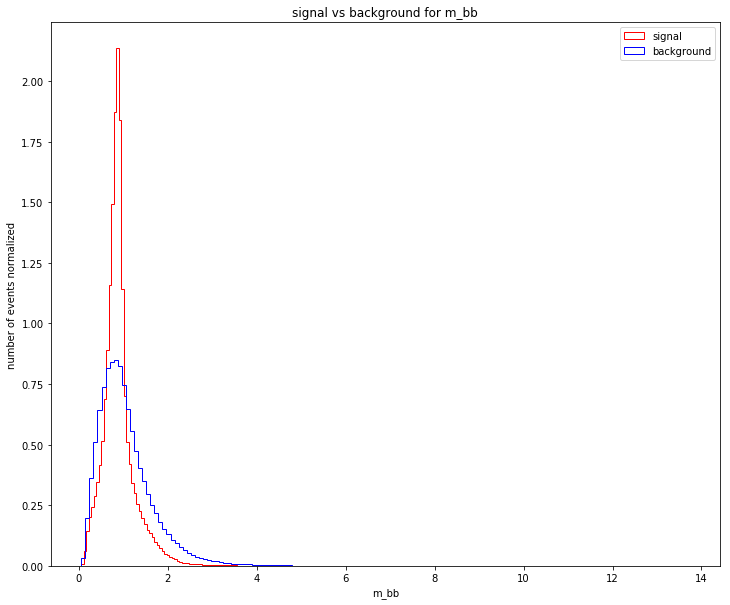

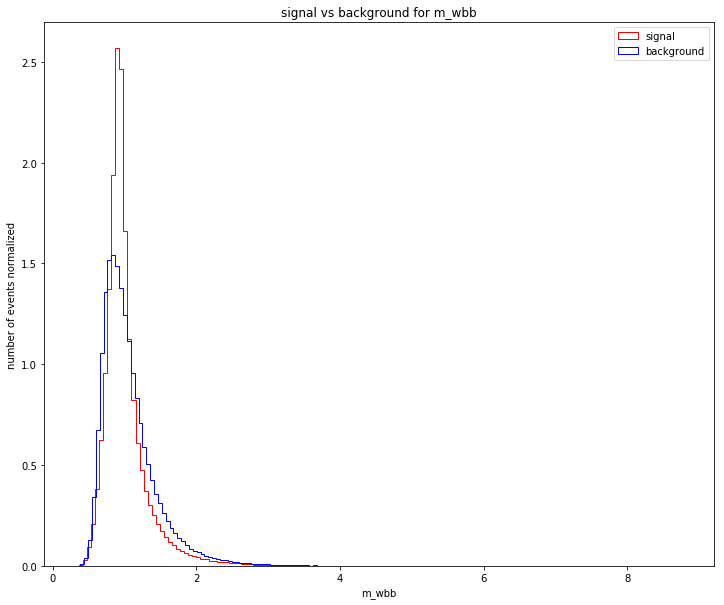

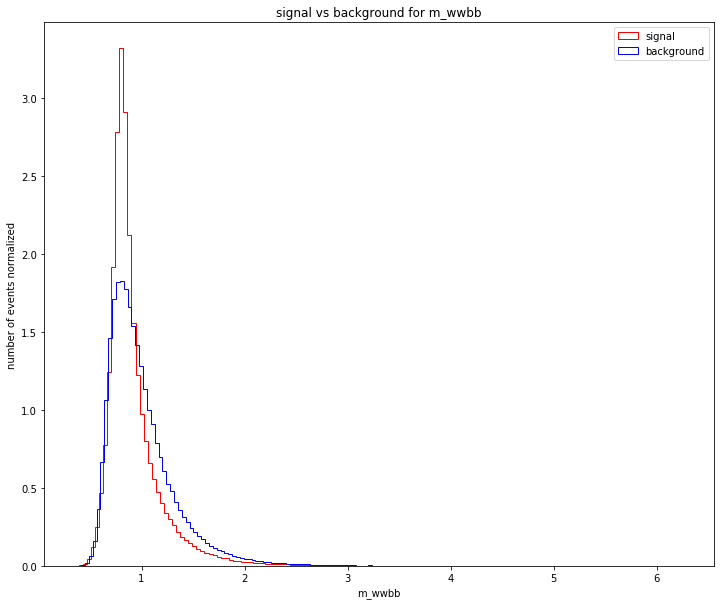

In [11]:
import matplotlib.pyplot as plt
for var in VarNames[1:]:
    plt.figure(figsize=(12,10))
    plt.title('signal vs background for '+str(var))
    plt.hist(np.array(df_sig[var]),bins=150,histtype="step", color="red",label="signal", stacked=True,normed=True)
    plt.hist(np.array(df_back[var]),bins=150,histtype="step", color="blue", label="background", stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.ylabel('number of events normalized')
    plt.xlabel(var)
    plt.show()

c. Use scikit-learn to train and compare ROC curves and AUC values for 3 classifiers.

In [15]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()
N_Train=1000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["Signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["Signal"]

Test_sig=Test_Sample[Test_Sample.Signal==1]
Test_bkg=Test_Sample[Test_Sample.Signal==0]


Fisher.fit(X_Train,y_Train)



#plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]],bins=100,histtype="step", color="blue", label="signal",stacked=True)
#plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]],bins=100,histtype="step", color="red", label="background",stacked=True)
#plt.legend(loc='upper right')
#plt.show()

ValueError: ignored

<Figure size 432x288 with 0 Axes>

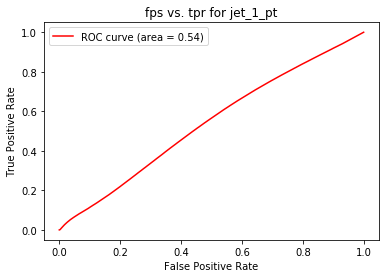

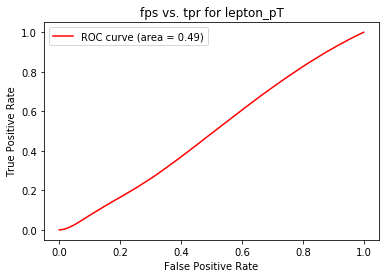

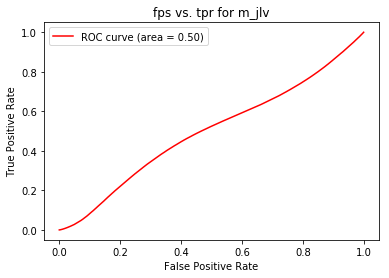

In [0]:
from sklearn.metrics import roc_curve, auc
def plot(var,name=''):
  fpr, tpr,_= roc_curve(df.Signal,var )
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr,color='red',label='ROC curve (area = %0.2f)' % roc_auc)
  plt.legend()
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('fps vs. tpr for '+name)
  plt.show()
  
plot(df.jet_1_pt,'jet_1_pt')
plot(df.lepton_pT,'lepton_pT')
plot(df.m_jlv,'m_jlv')

d. Find the optimal (most significant) cut value for each classifier assuming 100 signal and 1000 background events.

e. Use your answer to part 1 question 2b to show that you can compute the same mass features in the dataset from the 4-vectors in the dataset.